In [2]:
%load_ext rpy2.ipython
%matplotlib inline
from fbprophet import Prophet
import pandas as pd

In [2]:
%%R
library(prophet)

/usr/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Rcpp

  warnings.warn(x, RRuntimeWarning)


## Sub-daily data

Prophet can make forecasts for time series with sub-daily observations by passing in a dataframe with timestamps in the `ds` column. When sub-daily data are used, daily seasonality will automatically be fit. Here we fit Prophet to data with 5-minute resolution:

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


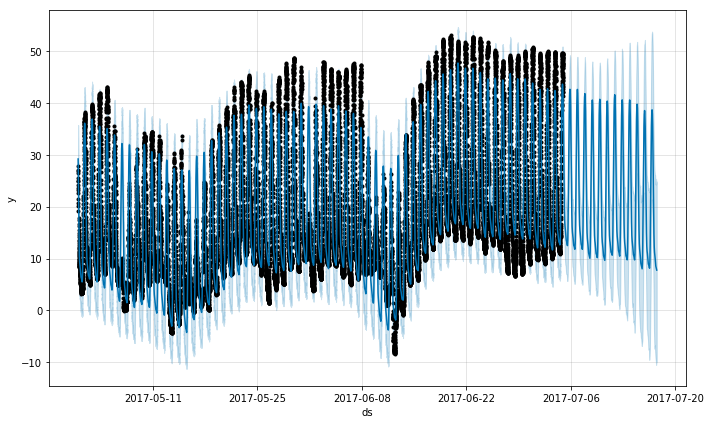

In [6]:
df = pd.read_csv('../examples/example_yosemite_temps.csv')
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
m.plot(fcst);

## Monthly data

You can use Prophet to fit monthly data. However, the underlying model is continuous-time, which means that you can get strange results if you fit the model to monthly data and then ask for daily forecasts. Here we forecast US retail sales volume for the next 10 years:

STAN OPTIMIZATION COMMAND (LBFGS)
init = user
save_iterations = 1
init_alpha = 0.001
tol_obj = 1e-12
tol_grad = 1e-08
tol_param = 1e-08
tol_rel_obj = 10000
tol_rel_grad = 1e+07
history_size = 5
seed = 21092286
initial log joint probability = -2.41173
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


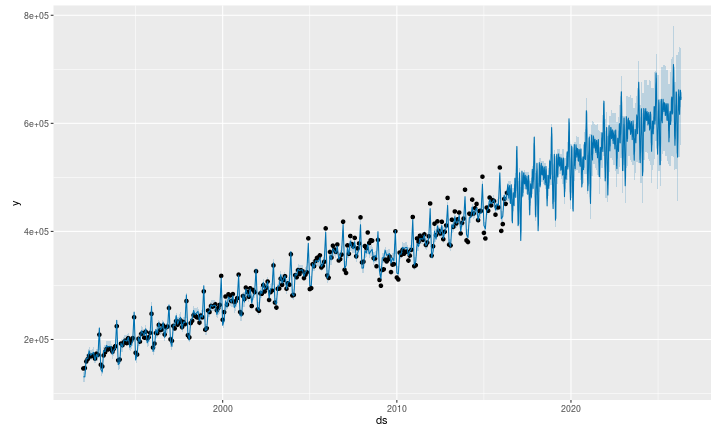

In [3]:
%%R -w 10 -h 6 -u in
df <- read.csv('../examples/example_retail_sales.csv')
m <- prophet(df)
future <- make_future_dataframe(m, periods = 3652)
fcst <- predict(m, future)
plot(m, fcst);

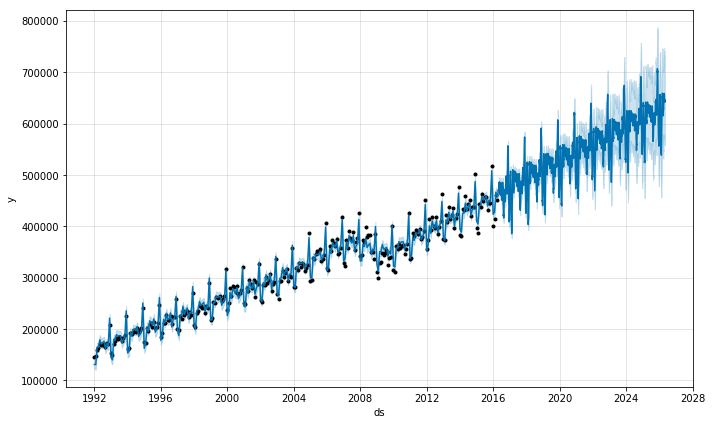

In [4]:
df = pd.read_csv('../examples/example_retail_sales.csv')
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
m.plot(fcst);

The forecast here seems very noisy. What's happening is that this particular data set only provides monthly data. When we fit the yearly seasonality, it only has data for the first of each month and the seasonality components for the remaining days are unidentifiable and overfit. When you are fitting Prophet to monthly data, only make monthly forecasts, which can be done by passing the frequency into make_future_dataframe:

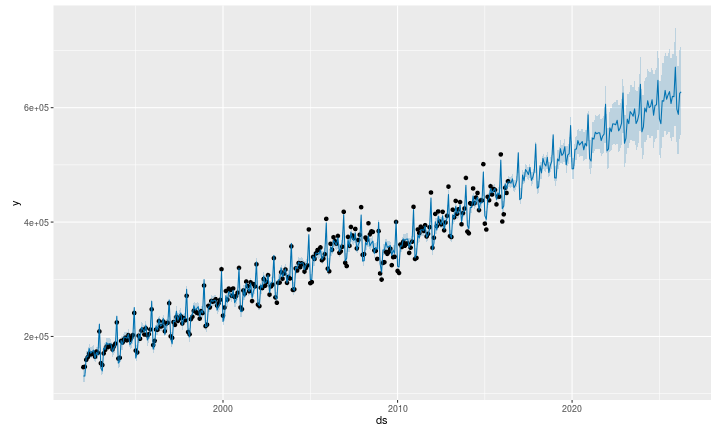

In [5]:
%%R -w 10 -h 6 -u in
future <- make_future_dataframe(m, periods = 120, freq = 'm')
fcst <- predict(m, future)
plot(m, fcst)

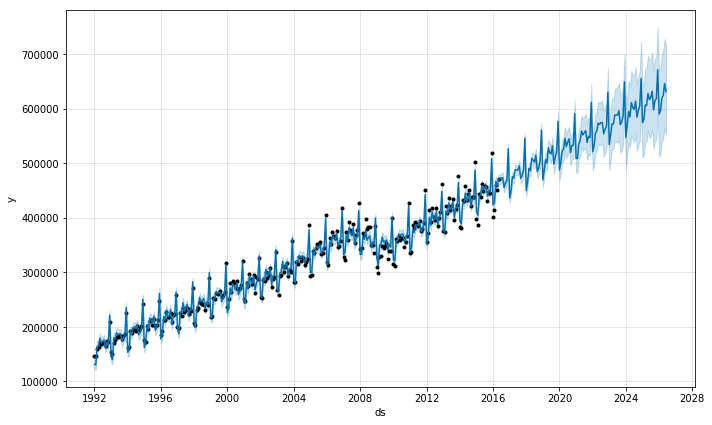

In [6]:
future = m.make_future_dataframe(periods=120, freq='M')
fcst = m.predict(future)
m.plot(fcst);